In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
dt = 1/252
S_0 = 11130.44
r = 0.01
Nsim = 1000
N = 493 #Number of business days from 16 Aug 2022 to 5 Aug 2024
sigma = 0.13447749255912064

In [30]:
def GBM(sigma, N,  S_0 = 11130.44, r = 0.01 , Nsim = 10000):
    # Create a 2D array to store the stock prices for each simulation
    S = np.zeros([Nsim,N])
    S[:,0] = S_0

    for i in range(Nsim):
        for j in range(N-1):
            Z = np.random.normal(0, 1)      
            # Calculate the stock price at time t+1 using the Geometric Brownian Motion model with risk-free interet rate
            S[i,j+1] = S[i,j] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * Z * np.sqrt(dt) )
    return S

In [ ]:
def GBM_AV(sigma, N,  S_0 = 11130.44, r = 0.01 , Nsim = 10000):
    # Create a 2D array to store the stock prices for each simulation
    S = np.zeros([Nsim,N])
    S[:,0] = S_0

    for i in range(Nsim//2):
        for j in range(N-1):
            Z = np.random.normal(0, 1)      
            # Calculate the stock price at time t+1 using the Geometric Brownian Motion model with risk-free interet rate
            S[2*i,j+1] = S[2*i,j] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * Z * np.sqrt(dt) )
            S[2*i+1,j+1] = S[2*i+1,j] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * -Z * np.sqrt(dt) )

    return S

In [32]:
def payoff(price_path, barrier_price = 6566.9596, initial_price = 11130.44):
    barrier_hit = min(price_path) <= barrier_price
    asset_final_price = price_path[-1]

    if barrier_hit:
        return 1000 * (asset_final_price / initial_price)
    else:
        return 1000 * max(1, 1 + 1.25 * (asset_final_price / initial_price - 1))

In [33]:
def payoff_sim(S, barrier_price, initial_price):
    num_simulations = S.shape[0]
    payoff_values = np.zeros(num_simulations)
    for i in num_simulations:
        payoff_values[i] = payoff(S[i], barrier_price, initial_price)
    return payoff_values

In [34]:
S = GBM(sigma, N)
S_AV = GBM_AV(sigma, N)


Text(0.5, 1.0, 'Stock price simulation using Geometric Brownian Motion')

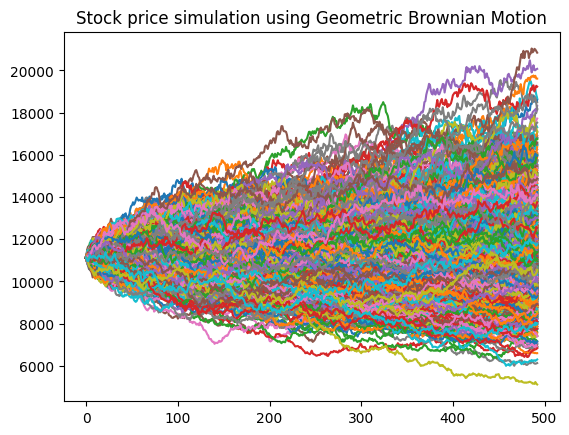

In [35]:
t = range(N)
for i in range(Nsim):
    plt.plot(t, S[i])
plt.title('Stock price simulation using Geometric Brownian Motion')

Text(0.5, 1.0, 'Stock price simulation using Geometric Brownian Motion with Antithetic Variates')

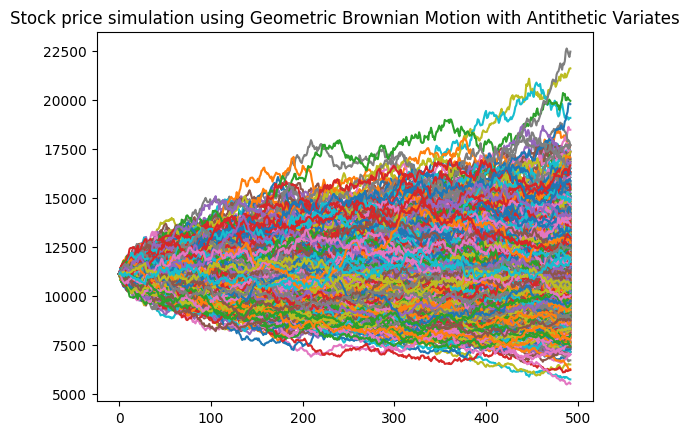

In [36]:
t = range(N)
for i in range(Nsim):
    plt.plot(t, S_AV[i])
plt.title('Stock price simulation using Geometric Brownian Motion with Antithetic Variates')

In [45]:
def gbm_SS(sigma, N, num_bins = 5,  S_0 = 11130.44, r = 0.01 , Nsim = 10000, barrier_price = 6566.9596):
    # Create a 2D array to store the stock prices for each simulation
    S = np.zeros([Nsim,N])
    S[:,0] = S_0

    for i in range(Nsim//num_bins):
        Z = np.random.normal(0, 1)
        for k in range(num_bins):
            S[num_bins*i+k,1] = S[num_bins*i+k,0] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * (Z+k)/num_bins * np.sqrt(dt) )

    for i in range(Nsim):   
        for j in range(1,N-1):
            Z = np.random.normal(0, 1)
            # Calculate the stock price at time t+1 using the Geometric Brownian Motion model with risk-free interet rate
            S[i,j+1] = S[i,j] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * Z * np.sqrt(dt) )
    return S

In [43]:
S_SS = gbm_SS(sigma, N)

Text(0.5, 1.0, 'Stock price simulation using Geometric Brownian Motion with SS')

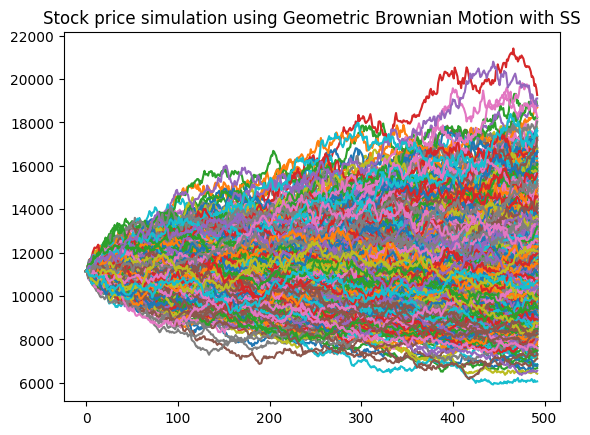

In [44]:

t = range(N)
for i in range(Nsim):
    plt.plot(t, S_SS[i])
plt.title('Stock price simulation using Geometric Brownian Motion with SS')